Before plotting simulation errors, log files from real piepline and simulator should be put in corresponding directories with correct names. See README.md.

In [1]:
import evaluate
import matplotlib.pyplot as plt
import numpy as np

Defining functions to plot simulation errors

In [7]:
# Function to plot a groupd bar chart
def grouped_bar_chart(labels, title, xlabel, ylabel, *argv):
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars
    bars = len(argv)

    fig, ax = plt.subplots()
    for i in range(len(argv)):
        arg = argv[i]
        ax.bar(x + (2 * i + 1 - bars) * width / 2, arg[1], width, label=arg[0])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(bottom=0, top=8)
    ax.legend()

    plt.show()

In [12]:
# Function to show simulation errors in a grouped bar chart
def plot_task_error(size):
    labels = ["read1", "write1", "read2", "write2", "read3", "write3"]

    # atop_file =     "log/cluster/100gb/atop_mem.log"
    real_time_log = "real/%dgb/timestamps.csv" % size
    sim_py_log = "pysim/%dgb_sim_time.csv" % size
    simgrid_org_log = "wrench_org/%dgb_sim_time.csv" % size
    simgrid_ext_log = "wrench_ext/%dgb_sim_time.csv" % size

    py_error = evaluate.task_time_error(real_time_log, sim_py_log)
    simgrid_org_error = evaluate.task_time_error(real_time_log, simgrid_org_log)
    simgrid_ext_error = evaluate.task_time_error(real_time_log, simgrid_ext_log)

    grouped_bar_chart(labels, "Simulation error with %dGB" % size, "tasks", "error",
                      ("Python", py_error), ("Original WRENCH", simgrid_org_error),
                      ("Extended WRENCH", simgrid_ext_error))

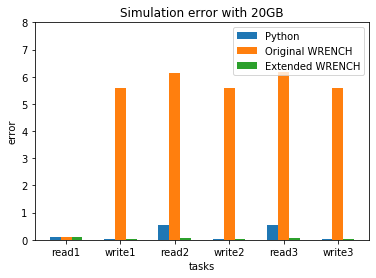

In [13]:
%matplotlib inline
plot_task_error(20)

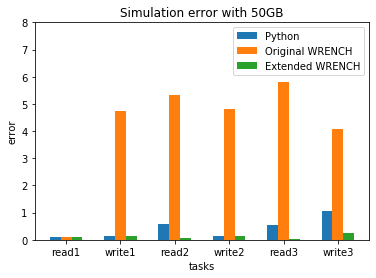

In [14]:
plot_task_error(50)

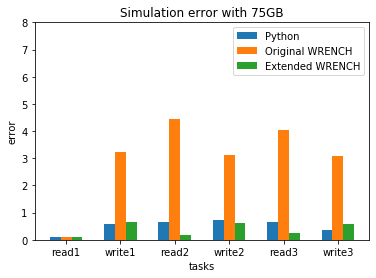

In [15]:
plot_task_error(75)

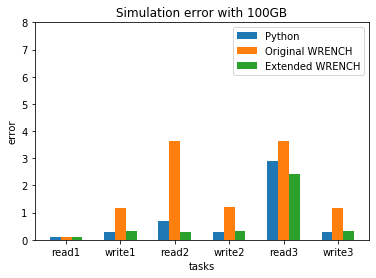

In [16]:
plot_task_error(100)